# Regression

## Overview

Regression is about finding the relationship between variables. Consider the following example. 

<img src="images/regression_abstract.png" alt="Example for Classification" style="width: 500px;"/>

We may be interested in the relationship between different properties of cars. Two important properties are fuel consumption and the top speed of cars. Usually, cars that can reach a higher top speed have stronger motors that consume more fuel. With regression, we can model the relationship between the variables using data about a sample of cars. 

A bit more abstract, classification looks as follows.

<img src="images/regression_general.png" alt="Example for Classification" style="width: 600px;"/>

We have a set of instances for which features are known. In regression analysis, the features are also often called the *independent variables*. We want to know the relationship between the features and a *dependent variable*, i.e., our value of interest. In the figure above, $x$ is our feature and $y$ is our dependent variable. Through the regression model we can describe how $y$ changes, when $x$ changes. The example shows a *linear regression*, i.e., regression through a linear model, which is a line in two dimensions. 

### The Formal Problem

Formally, we have a set of objects $O = \{object_1, object_2, ...\}$ that may be infinite. Moreover, we have representations of these objects in a feature space $\mathcal{F} \{\phi(o): o \in O\}$ that we assume is a subset of the real values, i.e., $\mathcal{F} \subseteq \mathbb{R}^m$. For each object, our value of interest is a dependent variable $f^*(o) = y \in \mathbb{R}$. 

The task of regression is to estimate a regression function $f: \mathcal{F} \to \mathbb{R}$ such that $f(\phi(o)) \approx f^*(o)$. 

## Performance of Regressions

Same as with regression, an important question is how we can estimate if a regression function is a good approximation of the dependent variable. We discuss the performance of linear regression using the two examples below. 

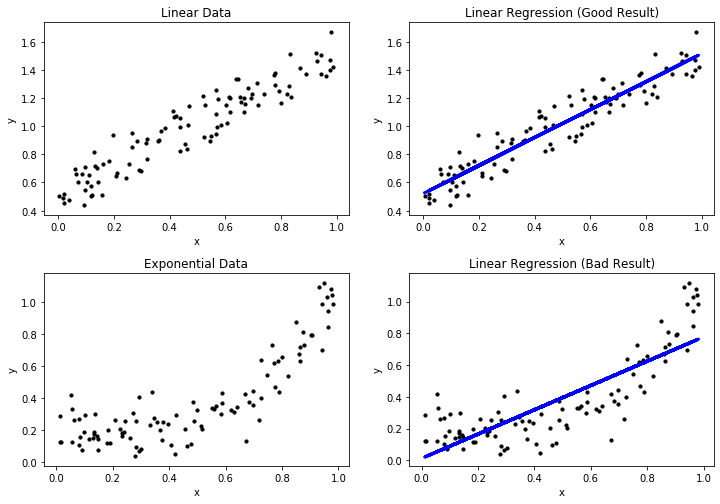

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

np.random.seed(seed=0)
n = 100

# Linear data
X_lin = np.random.rand(n, 1)
Y_lin = X_lin+np.random.randn(n, 1)*0.1+0.5

# Train and predict
regr_lin = LinearRegression()
regr_lin.fit(X_lin, Y_lin)
Y_lin_pred = regr_lin.predict(X_lin)

# Exponential data
X_exp = np.random.rand(n, 1)
Y_exp = X_exp**4+np.random.randn(n, 1)*0.1+0.19

# Train and predict
regr_lin = LinearRegression()
regr_lin.fit(X_exp, Y_exp)
Y_exp_pred = regr_lin.predict(X_exp)


# Scatterplot
f, axes = plt.subplots(2, 2, figsize=(12, 7))

axes[0, 0].set_title('Linear Data')
axes[0, 0].scatter(X_lin, Y_lin,  color='black', s=10)
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')

axes[0, 1].set_title('Linear Regression (Good Result)')
axes[0, 1].scatter(X_lin, Y_lin,  color='black', s=10)
axes[0, 1].plot(X_lin, Y_lin_pred, color='blue', linewidth=3)
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('y')

axes[1, 0].set_title('Exponential Data')
axes[1, 0].scatter(X_exp, Y_exp,  color='black', s=10)
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')

axes[1, 1].set_title('Linear Regression (Bad Result)')
axes[1, 1].scatter(X_exp, Y_exp,  color='black', s=10)
axes[1, 1].plot(X_exp, Y_exp_pred, color='blue', linewidth=3)
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('y')

plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.3)
plt.show()

The first example shows a very good regression model, where the regression function depicted in blue matches the data. This is expected, because we generated the data with a linear expression and use a linear expression model. The second example shows a bad regression model, because the regression does not really match the data. This is expected, because we fit a linear model to exponential data. In the following, we refer to the first example as the good result, and the second example as the bad result. 

### Visual Performance Assessment

The plots above already show the first way, the quality of a regression model can be assessed. We can plot the actual data and the regression function together in the same plot. Through this, we can see if the regression is close to the actual data and, therefore, likely a good fit. Moreover, we can see systematic errors in the regression. In the good result, we see that the actual data is evenly scattered around the regression line without a large deviation. Hence, we can see that there are small errors in the regression model, but there is no clearly discernable pattern in these errors. This is different for the bad result: at the beginning, the instances are all above the blue line, between 0.4 and 0.7 the instances are below the blue line and at the end the instances are, again, all above the blue line. This clear pattern is a strong indicator for a bad fit, because there is clearly an aspect of the data that is not covered by the regression model. When the instances are all above the blue regression line, we say that the regression function *under predicts*, when the instances are all below the regression line, we say that the regression function *over predicts*.  

Another way to look at the results of a prediction model visually is through the *residuals*. The residual of an instance $x \in \mathcal{F}$ for a regression function $f$ is defined as

$$e_x = f^*(x)-f(x) = y-f(x),$$

i.e., the difference between the actual value and the prediction. We can plot the residuals versus the values of a feature, to see how the deviation evolves.

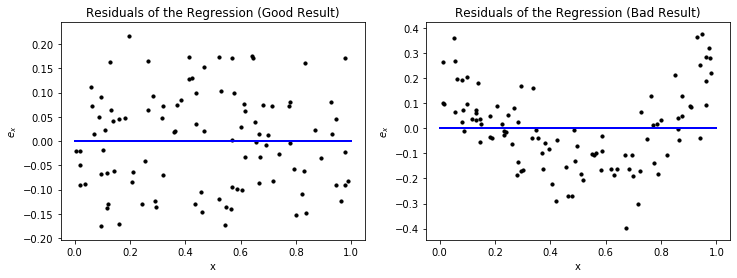

In [29]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].set_title('Residuals of the Regression (Good Result)')
axes[0].scatter(X_lin, Y_lin-Y_lin_pred,  color='black', s=10)
axes[0].plot([0, 1],[0,0] , color='blue', linewidth=2)
axes[0].set_xlabel('x')
axes[0].set_ylabel('$e_x$')

axes[1].set_title('Residuals of the Regression (Bad Result)')
axes[1].scatter(X_exp, Y_exp-Y_exp_pred,  color='black', s=10)
axes[1].plot([0, 1],[0,0] , color='blue', linewidth=2)
axes[1].set_xlabel('x')
axes[1].set_ylabel('$e_x$')

plt.show()

The residuals provide a similar view on the error of the regression function as we have seen above. However, just looking at the plots, one may think that the left plot for the good result is actually bad, because the spread from the blue line, which indicates correct predictions, looks large. However, a closer look at the y-axis reveals that this is only because the absolute values of the results are very small. If the y-axis would have a larger range, a bad result could indeed look similar. Thus, it is always important to consider the scale of the y-axis of residual plots in order to investigate the absolute magnitude of the residuals. For the bad result, we see the same over and under prediction patterns we observed before. We also see that the range of the y-axis is much larger than for the good result, which also indicates that this is not a good result. 

The drawback of the above visualizations is that they only work for single features. However, there is another way of visual analysis that allows us to gain insights into the data. The idea is similar to the confusion matrix we know from [Chapter 7](07_Classification): we plot the actual values of the dependent variable versus the predicted values. 

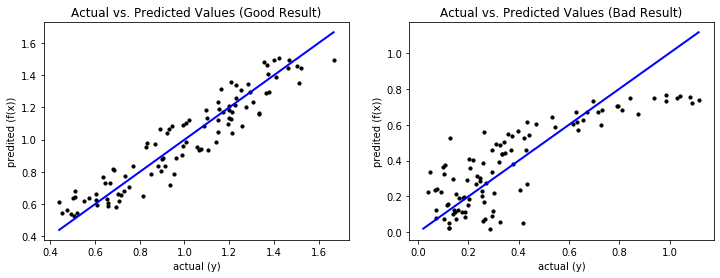

In [24]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].set_title('Actual vs. Predicted Values (Good Result)')
axes[0].scatter(Y_lin, Y_lin_pred,  color='black', s=10)
axes[0].plot([np.min(np.minimum(Y_lin, Y_lin_pred)), np.max(np.maximum(Y_lin, Y_lin_pred))],[np.min(np.minimum(Y_lin, Y_lin_pred)), np.max(np.maximum(Y_lin, Y_lin_pred))] , color='blue', linewidth=2)
axes[0].set_xlabel('actual (y)')
axes[0].set_ylabel('predited (f(x))')

axes[1].set_title('Actual vs. Predicted Values (Bad Result)')
axes[1].scatter(Y_exp, Y_exp_pred,  color='black', s=10)
axes[1].plot([np.min(np.minimum(Y_exp, Y_exp_pred)), np.max(np.maximum(Y_exp, Y_exp_pred))],[np.min(np.minimum(Y_exp, Y_exp_pred)), np.max(np.maximum(Y_exp, Y_exp_pred))] , color='blue', linewidth=2)
axes[1].set_xlabel('actual (y)')
axes[1].set_ylabel('predited (f(x))')

plt.show()

Ideally, the prediction equals the actual values, which is on the diagonal of the plot. The further away the data is from the diagonal, the worse the prediction. For a good result, the predictions are close to the diagonal and the deviations are random without a clear pattern, similar to our prior visual analysis. For a bad results, the deviations from the diagonal are larger and there may be patterns that show systematic errors. This is the case for the bad result. For the data where the actual values are less than 0.35, the prediction is completely random, which we can see due to the random pattern with large deviations from the diagonal in this area. For larger actual values, we see systematic errors: first there is over prediction, then there is under prediction. 

### Performance Metrics

There are also several performance metrics that can be used to assess the quality of regression models. These metrics are based on the residuals. Let $X = \{x_1, ..., x_n\} \subseteq \mathcal{F} \subseteq \mathbb{R}^m$ a sample of instance with $m$ features and $Y = \{y_1, ..., y_n\} \subseteq \mathbb{R}$ the corresponding dependent variables. 

| Metric | Description | Definition |
|--------|-------------|------------|
| Mean Absolute Error | The arithmetic mean of the absolute residuals, i.e., the mean absolute deviation of the predictions from the actual values. | $MAE = \frac{1}{n} \sum_{i=1}^n \vert e_{x_i}|$ |
| Mean Squared Error | The arithmetic mean of the squared residuals. | $MSE = \frac{1}{n} \sum_{i=1}^n e_{x_i}^2$ |
| R Squared, R2, $R^2$ | The coefficient of determination, which is defined as the fraction of the variance of the data that is explained by the regression model. | $R^2 = 1 - \frac{\sum_{i=1}^n (y_i-f(x_i))^2}{\sum_{i=1}^n (y_i-mean(Y))^2} = 1 - \frac{\sum_{i=1}^n e_{x_i}^2}{\sum_{i=1}^n (y_i-mean(Y))^2}$
| Adjusted R Squared | Adjustment of $R^2$ that takes the model complexity into account | $\bar{R}^2 = 1 - (1-R^2)\frac{n-1}{n-m-1}$ |

The MAE measures the absolute difference between the predictions and the actual values. The similar measure MSE uses the squared distances instead of the actual distances. Because the MSE uses the squared residuals, it is more sensitive to outliers in the residuals than MAE. Thus, MSE increases strongly with outliers, while these may be hidden with MAE. The biggest problem with MAE and MSE is that both are absolute measures for the error and, thus, hard to interpret because there is no fixed reference point. The performance measures for classification were mostly distributed in the interval [0,1] and it was clear what a perfect result looks like and what the worst possible result looks like. To interpret MAE and MSE, detailed knowledge about the dependent variable is required, especially about the scale of the dependent variable and the meaning of differences. 

In that respect, $R^2$ is more similar to the metrics we know from classification and is distributed in the interval [0,1], where 1 is a perfect value. $R^2$ answers the question how much better the regression function is than just using the arithmetic mean of the data. The sum in the denominator is over the residuals of the arithmetic mean as the regression function. In the nominator, we have the sum of the residuals of the regression. If we would divide both the nominator and denominator by $|X|$, we would have the MSE as nominator and the variance as denominator. In other words, $R^2$ measures the ratio of MSE the model and the variance of the dependent variable. The lower the MSE in relation to the variance, the better.

A weakness of $R^2$ is that this usually decreases with more features, which can lead to overfitting. Adjusted $R^2$ addresses this weakness by taking the number of features into account. Thus, if the decrease in MSE is less than the penalty of adjusted $R^2$ for the number of features, adjusted $R^2$ increases. 

We now look at the values of these performance metrics for our example. 

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def adjusted_r2_score(Y, Y_pred, n_instances, n_features):
    return (1-(1-r2_score(Y, Y_pred))*(n_instances-1)/(n_instances-n_features-1))

print('Performance Metrics (Good Result)')
print('MAE:         %.2f' % mean_absolute_error(Y_lin, Y_lin_pred))
print('MSE:         %.2f' % mean_squared_error(Y_lin, Y_lin_pred))
print('R2:          %.2f' % r2_score(Y_lin, Y_lin_pred))
print('Adjusted R2: %.2f' % adjusted_r2_score(Y_lin, Y_lin_pred, n, 1))
print()
print('Performance Metrics (Bad Result)')
print('MAE:         %.2f' % mean_absolute_error(Y_exp, Y_exp_pred))
print('MSE:         %.2f' % mean_squared_error(Y_exp, Y_exp_pred))
print('R2:          %.2f' % r2_score(Y_exp, Y_exp_pred))
print('Adjusted R2: %.2f' % adjusted_r2_score(Y_exp, Y_exp_pred, n, 1))

Performance Metrics (Good Result)
MAE:         0.08
MSE:         0.01
R2:          0.89
Adjusted R2: 0.89

Performance Metrics (Bad Result)
MAE:         0.13
MSE:         0.03
R2:          0.68
Adjusted R2: 0.68


We directly observe the problem with MAE and MSE: because we have randomly generated data, MAE and MSE have no real meaning for us. We only see that the values of the bad result are larger than the values for the good result: about 60% higher for MAE and about 3 times higher for MSE. Please note that the values for MSE are less than the values for MAE, because $x^2 < x$ for $x \in (0,1)$. This further emphasizes that the interpretation of MAE and MSE is difficult. 

For $R^2$ we also see that the value of the good result is much larger than of the bad result. The bad result explains only about 2/3 of the variance, while the good result explains almost 90%. Adjusted $R^2$ is not different, because we only have a single feature. 

## Linear Regression

### Ordinary Least Squares

### Ridge

### Lasso

### Elastic Net